# 1. Convolutional Neural Network (CNN):

In [27]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading the datasets and splitting into test and train sets

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Checking the shape of the datasets
train_images.shape

(60000, 28, 28)

In [5]:
# Scaling the values to a range of 0 to 1 before feeding to the neural network model

train_images = train_images / 255.0

test_images = test_images / 255.0

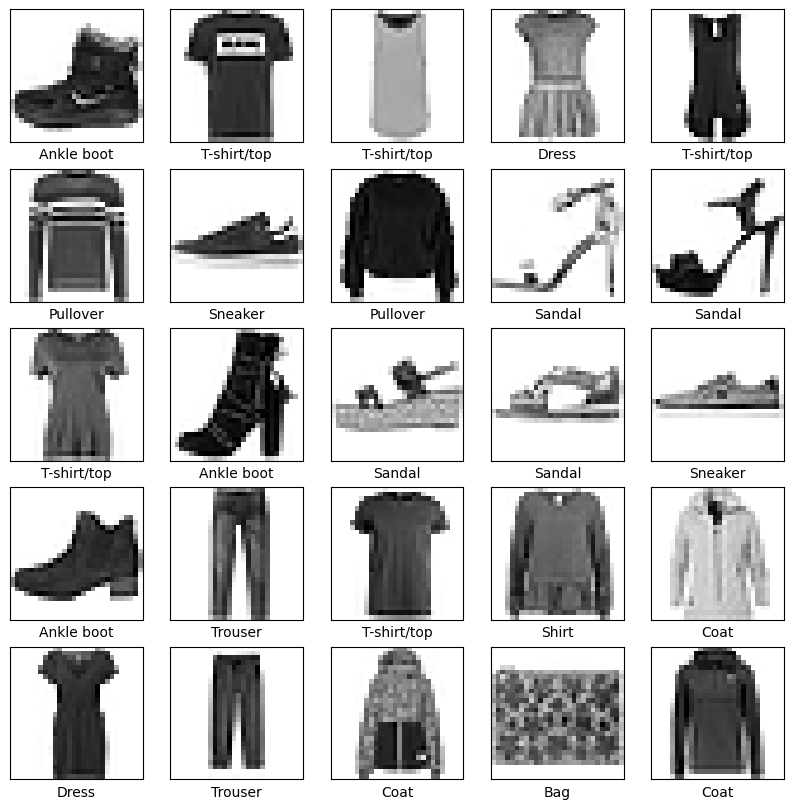

In [6]:
# Display the first 25 images from the training set 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
# Building CNN Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 28s 3ms/step - loss: 0.5042 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3146 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2965 - accuracy: 0.8909


In [10]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 16s 2ms/step - loss: 0.3474 - accuracy: 0.8784
Test accuracy: 0.8784000277519226


# Make Predictions

In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 2ms/step


In [12]:
predictions[0]

array([2.9039754e-06, 1.0621921e-07, 2.3689370e-06, 9.1190820e-08,
       2.0386599e-06, 1.8309960e-02, 1.4065299e-06, 7.0980176e-02,
       4.5717417e-07, 9.1070038e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [14]:
# Creating a prediction model

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

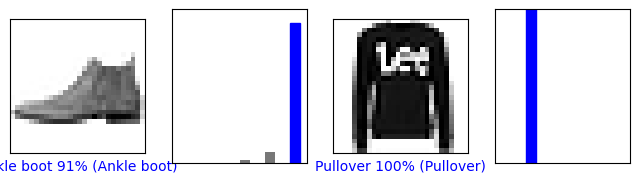

In [24]:
# Plot the first 2 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 1
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

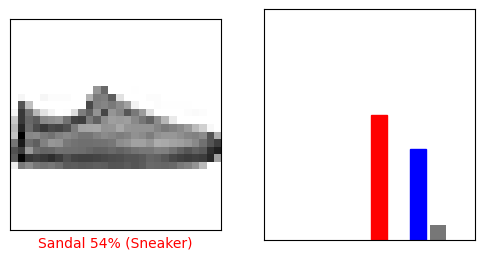

In [26]:
# Making prediction for the 12th Item
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()